In [77]:
from src.class_polygon import Polygon
from src.smth2matrix.shift2zero import shift2zero
import numpy as np
from src.greedy_alg.class_pallets import Pallets
from src.class_item import Item

# from copy import copy
import copy
import math


from src.class_packing import Packing
from src.smth2lines.polygon2segments import polygon2segments

In [78]:
h = 1

# width= 5752
# height = 10000

width = 79
height = 600

# width = 40
# height = 80

# num_rot=4
# num_sort=2
eps=0.0

"""Входные данные типа swim.txt (trousers.txt)"""
# ------------  чтение файла  ------------
# path = 'shirts.txt'
# path = 'swim.txt'
path = 'trousers.txt'
# path = "src\\input\\" + input_file_name
f = open(path, 'r')
line = f.readline()
polygons = []
while line:
    f.readline()  #QUANTITY
    quantity = int(f.readline().split(' ')[0][:-1])
    f.readline()  #NUMBER OF VERTICES
    num_verties = int(f.readline().split(' ')[0][:-1])
    f.readline()  #VERTICES (X,Y)
    polygon = []
    for _ in range(num_verties):
        line = f.readline()
        list_point = (''.join([
            line[i] for i in range(len(line) - 1)
            if not ((line[i] == ' ') and (line[i + 1] == ' '))
        ])).split(' ')
        point = [float(list_point[-2]), float(list_point[-1])]
        polygon.append(copy.deepcopy(point))
    for _ in range(quantity):
        polygons.append(copy.deepcopy(polygon))

    f.readline()  #
    line = f.readline()  #PIECE k
f.close()


# h = 3
#
# width = 100
# height = 200
#
# path = 'concave30/test12.txt'
# f = open(path, 'r')
# num_items = int(f.readline())
# polygons = np.full(num_items, None)
# list_pallet_shape = f.readline().split(' ')
# for i in range(num_items):
#     list_points = f.readline().split(' ')
#     points = []
#     for j in range(0, len(list_points) - 1, 2):
#         point = [float(list_points[j]), float(list_points[j + 1])]
#         points.append(point)
#     if (points[0][0] == points[-1][0] and points[0][1] == points[-1][1]):
#         points.pop()
#     polygons[i] = np.array(points)
# f.close()


packing = Packing(width=width, height=height, drill_radius=0)

packing.polygons = copy.deepcopy(polygons)
packing.num_items = len(polygons)

pallets = Pallets([width, height])
pallets.grid_step = h
pallets.add_pallet_lines()

print(pallets.pallet_lines)

[[[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]],

In [79]:
packing.items = np.full(len(polygons), None)

for id in range(len(polygons)):

    rotated_points = copy.deepcopy(polygons[id])
    new_points = Polygon(rotated_points)
    new_points.rotate(3*math.pi/2)
    new_points.move_to_origin()
    points1 = new_points.points_to_list()

    item = Item(id, copy.deepcopy(points1))
    packing.items[id] = copy.deepcopy(item)
    packing.items[id].rotation = 0

    # item = Item(id, polygons[id])
    # packing.items[id] = item
    # item.rotation = 0

packing.pallets = pallets
packing.h = h
packing.add_segments_for_items()
packing.set_squares()


In [80]:
# h = 0.4
#
# points_1 = np.array([[0.58926808, 0.82554894],
#  [0.,         0.79957281],
#  [0.47827989, 0.36675047],
#  [0.37141829, 0.        ],
#  [0.75175641, 0.05664668],
#  [0.95640232, 0.11052855],
#  [1.14280225, 0.18556183],
#  [1.58117,   0.34681621],
#  [1.28802218, 0.63747178],
#  [0.97332752, 0.61417636],
#  [0.83930078, 1.13645914]])
# points_2 = np.array([[3.01979822, 2.07025999],
#  [2.73305743, 1.40585017],
#  [1.96521414, 1.48349362],
#  [1.4258782,  0.83554282],
#  [1.7142081,  0.02687157],
#  [2.64006002, 0.10048232],
#  [3.18140955, 0.08416952],
#  [3.91775227, 0.        ],
#  [4.05815576, 0.74132842],
#  [3.80823739, 1.28051197],
#  [3.77836706, 2.10301042]])
# points_3 = np.array([[4.47245017, 0.64193153],
#  [4.36033045, 0.29639881],
#  [4.61709623, 0.14835729],
#  [4.93464073, 0.        ],
#  [5.09478795, 0.35545135],
#  [5.83320232, 0.23552848],
#  [5.60724152, 0.74163422],
#  [5.49637574, 1.09712479],
#  [5.27505259, 1.36176241],
#  [4.95925593, 1.44778698],
#  [4.70553081, 1.14597412],
#  [4.47159612, 1.17799969],
#  [4.12091693, 1.12014556],
#  [4.05815576, 0.8111184 ]])
# points_4 = np.array([[6.14400618, 0.55002146],
#  [6.4439746,  0.32950471],
#  [6.78549594, 0.03210842],
#  [7.34200891, 0.        ],
#  [7.4987618,  0.53949475],
#  [7.69272628, 1.02659783],
#  [7.74826833, 1.78236417],
#  [6.83573843, 1.17035837],
#  [6.57750562, 1.45971592],
#  [5.77437183, 1.68831751],
#  [5.60724152, 0.98909752]])
# points_5 = np.array([[5.2222155,  2.83143304],
#  [3.18669633, 3.72914302],
#  [1.90982314, 1.86197557],
#  [3.8455557,  1.2       ]])
# points_6 = np.array([[8.44222416, 0.34435145],
#  [8.79719579, 0.47157979],
#  [9.26160975, 0.        ],
#  [9.69847081, 0.2958785 ],
#  [9.32623779, 0.89897369],
#  [9.84880988, 1.29880309],
#  [9.45429884, 1.61936394],
#  [8.98844578, 1.46498817],
#  [8.63511005, 2.05304967],
#  [8.33400149, 1.61707586],
#  [8.20145922, 1.275845  ],
#  [7.70546979, 0.92331586],
#  [8.41307863, 0.73233859]])
# points_7 = np.array([[0.15768241, 1.58186696],
#  [0.,        1.26391856],
#  [0.3695445,  1.2       ],
#  [1.0803024,  1.36436947],
#  [0.47897582, 1.83433517]])
#
# polygons = [copy(points_1), copy(points_2), copy(points_3), copy(points_4), copy(points_5), copy(points_6), copy(points_7)]
#
# packing = Packing(width=10, height=10, drill_radius=0)
#
# pallets = Pallets([10, 10])
# pallets.grid_step = h
# pallets.add_pallet_lines()
#
# print(pallets.pallet_lines)


In [81]:
# packing.items = np.full(len(polygons), None)
#
# for id in range(len(polygons)):
#     item = Item(id, polygons[id])
#     packing.items[id] = item
#     item.rotation = 0
#     item.set_square()
#
# packing.pallets = pallets
# packing.h = h
# packing.add_segments_for_items()

In [82]:
def pack_item(item, pallets, t_vector, r, rotation):
    item.t_vector = [t_vector, r]
    item.packed = True
    for s in range(len(item.segments[rotation])):
        for l in range(len(item.segments[rotation][s])):
            new_line = [copy.copy(item.segments[rotation][s][l][0]) + copy.copy(item.t_vector[0]), copy.copy(item.segments[rotation][s][l][1]) + copy.copy(item.t_vector[0])]
            pallets.pallet_lines[r+s].append(copy.copy(new_line))
        pallets.pallet_lines[r+s].sort(key=lambda x: int(x[0]), reverse=False)

    def first_elem(e):
      return e[0]

    for line in pallets.pallet_lines:
        for segment in line:
            segment.sort()
        line.sort(key=first_elem)
        i = 0
        while i < (len(line) - 1):
            if line[i][1] == line[i+1][0]:
                line[i][1] = line[i+1][1]
                line.pop(i+1)
                continue
            if line[i][1] > line[i+1][0]:
                if line[i][1] < line[i+1][1]:
                    line[i][1] = line[i+1][1]
                    line.pop(i+1)
                    continue
                elif line[i][1] >= line[i+1][1]:
                    line.pop(i+1)
                    continue
            i+=1



def pack_segments(items, pallets):
    packed_items = 0
    pack_gravity_center_x, pack_gravity_center_y, pack_weight = 0, 0, 0
    # max_packed_height = 0
    while packed_items < len(items):
        packed_items +=1
        best_ff = 0
        # best_item = items[0]
        # best_t_vector = 0
        # best_rotation = 0
        # best_r = 0
        for item in items:
            if item.packed == False:
                # item = items[1]
                # best_height = len(pallets.pallet_lines)
                # best_height = 1000
                # best_t_vector = 0
                # best_rotation = 0
                # best_r = 0
                for rotation in range(item.rotation + 1):
                    segments = item.segments[rotation]
                    # print(segments)
                    r = 0
                    while r < len(pallets.pallet_lines):
                    # while r < max_packed_height + 1:
                        row = pallets.pallet_lines[r]
                        k = 1
                        ex_flag = 0
                        while k < len(row) and item.packed == False and ex_flag == 0:
                            t_vector = row[k-1][1] - segments[0][0][0]
                            i = 0
                            # l = len(segments[0])
                            while i < len(segments) and r + i < len(pallets.pallet_lines) and ex_flag == 0:
                                    j = 0
                                    # if
                                    while j < len(segments[i]) and ex_flag == 0:
                                        m = 0
                                        while m < len(pallets.pallet_lines[r+i]) and ex_flag == 0:
                                            # случаи пересечения линии и упаковки
                                            if pallets.pallet_lines[r+i][m][0] <= segments[i][j][0] + t_vector < pallets.pallet_lines[r+i][m][1]:
                                                t_vector += pallets.pallet_lines[r+i][m][1] - (segments[i][j][0] + t_vector)
                                                i = 0
                                            elif pallets.pallet_lines[r+i][m][0] <= segments[i][j][1] + t_vector < pallets.pallet_lines[r+i][m][1]:
                                                t_vector += pallets.pallet_lines[r+i][m][1] - (segments[i][j][0] + t_vector)
                                                i = 0
                                            elif segments[i][j][0] + t_vector < pallets.pallet_lines[r+i][m][0] and pallets.pallet_lines[r+i][m][1] < segments[i][j][1] + t_vector:
                                                t_vector += pallets.pallet_lines[r+i][m][1] - (segments[i][j][0] + t_vector)
                                                i = 0
                                            elif pallets.pallet_lines[r+i][m][0] == segments[i][j][0] + t_vector == segments[i][j][1] + t_vector or pallets.pallet_lines[r+i][m][1] == segments[i][j][0] + t_vector == segments[i][j][1] + t_vector :
                                                t_vector += pallets.pallet_lines[r+i][m][1] - (segments[i][j][0] + t_vector)
                                                i = 0
                                            # объект выходит за границы палеты
                                            elif segments[i][j][0] + t_vector < 0:
                                                t_vector = - segments[i][j][0]
                                                i = 0
                                            # наверное надо сделать это первым условием, будет чаще всего встречаться
                                            elif segments[i][j][1] + t_vector > pallets.shape[0]:
                                                ex_flag = 1
                                            m += 1
                                        j += 1
                                    i+=1
                            # если объект влезает, запоминаем его параметры
                            if ex_flag == 0:

                                # pack_item(item, pallets, t_vector, r, rotation)
                                # ff_1 = (pack_gravity_center_x + (item.segment_gravity_center_x[rotation] + t_vector) * item.segment_square[rotation])  / (pack_weight + item.segment_square[rotation])
                                ff_2 = (pack_gravity_center_y + (item.segment_gravity_center_y[rotation] + r) * item.segment_square[rotation]) / (pack_weight + item.segment_square[rotation])
                                # подумать над функцией
                                ff = (item.area)/ (ff_2)

                                # if best_height > r + len(segments):
                                if ff > best_ff:
                                    # best_height = r + len(segments)
                                    best_ff = ff
                                    best_t_vector = copy.copy(t_vector)
                                    best_rotation = rotation
                                    best_r = r
                                    best_item = item
                                    print(best_t_vector, best_r)
                                ex_flag = 1
                            k+=1
                        r+=1
        print('pack!', best_t_vector, best_r)
        pack_item(best_item, pallets, best_t_vector, best_r, best_rotation)
        # if best_r + len(best_item.segments[best_rotation]):
        #     max_packed_height = best_r + len(best_item.segments[best_rotation])
        pack_gravity_center_x += (item.segment_gravity_center_x[rotation] + t_vector) * item.segment_square[rotation]
        pack_gravity_center_y += (item.segment_gravity_center_y[rotation] + r) * item.segment_square[rotation]
        pack_weight += item.segment_square[rotation]

pack_segments(packing.items, packing.pallets)
# for line in pallets.pallet_lines:
    # print(line)

0.0 0
0.0 0
pack! 0.0 0
22.0 0
22.0 0
pack! 22.0 0
44.0 0
44.0 0
pack! 44.0 0
63.0 21
0.0 57
pack! 0.0 57
63.0 21
22.0 57
pack! 22.0 57
63.0 21
44.0 57
pack! 44.0 57
63.0 78
0.0 114
pack! 0.0 114
63.0 78
22.0 114
pack! 22.0 114
63.0 78
pack! 63.0 78
44.0 114
pack! 44.0 114
57.0 138
pack! 57.0 138
0.0 171
pack! 0.0 171
16.0 171
pack! 16.0 171
32.0 174
pack! 32.0 174
45.0 198
pack! 45.0 198
61.0 198
pack! 61.0 198
66.0 0
pack! 66.0 0
71.0 0
pack! 71.0 0
73.0 138
pack! 73.0 138
0.0 231
pack! 0.0 231
76.0 0
68.33333333333333 52
0.0 30
66.0 57
pack! 66.0 57
76.0 0
48.0 173
0.0 30
5.0 231
pack! 5.0 231
76.0 0
48.0 173
0.0 30
16.0 231
pack! 16.0 231
76.0 0
48.0 173
0.0 30
27.0 234
pack! 27.0 234
76.0 0
48.0 173
0.0 30
5.0 243
pack! 5.0 243
76.0 0
48.0 173
0.0 30
16.0 243
pack! 16.0 243
76.0 0
48.0 173
0.0 30
35.5 244
pack! 35.5 244
76.0 0
48.0 173
0.0 30
25.0 251
pack! 25.0 251
76.0 0
48.0 173
0.0 30
pack! 0.0 30
76.0 0
48.0 173
22.0 30
pack! 22.0 30
76.0 0
48.0 173
pack! 48.0 173
76.0 0
12.0

[63.0, 78]
[44.0, 114]
[57.0, 138]
[0.0, 171]
[16.0, 171]
[32.0, 174]
[45.0, 198]
[61.0, 198]
[0.0, 0]
[22.0, 0]
[44.0, 0]
[0.0, 57]
[22.0, 57]
[44.0, 57]
[0.0, 114]
[22.0, 114]
[66.0, 0]
[71.0, 0]
[73.0, 138]
[0.0, 231]
[76.0, 0]
[76.0, 22]
[77.0, 44]
[44.0, 77]
[46.0, 82]
[22.0, 96]
[24.0, 96]
[0.0, 97]
[48.0, 173]
[12.0, 253]
[5.0, 254]
[33.6, 255]
[17.933333333333334, 257]
[40.06666666666667, 257]
[46.800000000000004, 258]
[53.800000000000004, 258]
[22.0, 44]
[0.0, 30]
[0.0, 45]
[22.0, 30]
[0.0, 83]
[22.0, 82]
[44.0, 30]
[44.0, 43]
[66.0, 57]
[5.0, 231]
[16.0, 231]
[27.0, 234]
[5.0, 243]
[16.0, 243]
[35.5, 244]
[25.0, 251]
[66.0, 69]
[48.0, 189]
[60.64615384615385, 258]
[68.64615384615385, 264]
[4.2, 270]
[23.333333333333332, 271]
[59.6, 271]
[33.33333333333333, 273]
[44.0, 105]
[0.0, 162]
[22.0, 161]
[72.0, 192]


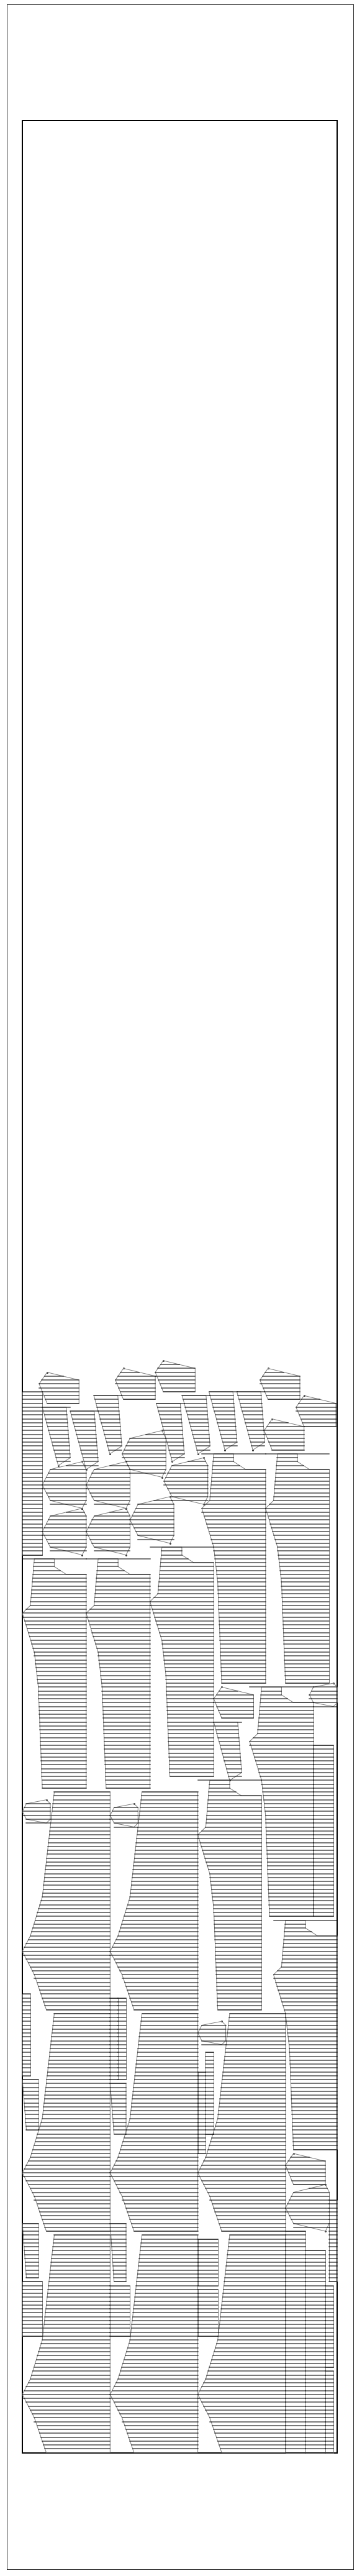

In [83]:
import random
from matplotlib import pyplot as plt, patches

pallet_width = width
pallet_height = height

fig, ax = plt.subplots()

MAX_SIZE = 10
if pallet_width > pallet_height:
    fig.set_figheight(MAX_SIZE)
    fig.set_figwidth(
        MAX_SIZE * pallet_width/pallet_height)
else:
    fig.set_figheight(
        MAX_SIZE * pallet_height/pallet_width)
    fig.set_figwidth(MAX_SIZE)

pallet = patches.Rectangle((0, 0),
                            pallet_width,
                            pallet_height,
                            linewidth=2,
                            facecolor='none',
                            edgecolor='black')
ax.add_patch(pallet)
# ax.set_xlim(-0.5, pallet_width + 2)
# ax.set_ylim(-0.5, pallet_height + 2)

# for i in range(int(pallet_height/h)):
#     plt.plot([0, pallet_width], [i*h, i*h], linestyle = 'dotted', color = 'black')


for polygon in packing.items:
    print(polygon.t_vector)
    for point in polygon.points:
        point[0] += polygon.t_vector[0]
        point[1] += polygon.t_vector[1]*h
    figure = patches.Polygon(polygon.points,
                            linewidth=1,
                            edgecolor='gray',
                            fill=False)
    ax.add_patch(figure)
    random_color = "#" + \
                ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    random_color = 'black'
    for i in range(len(polygon.segments[0])): #0 заменить на лучший угол
        for sigment in polygon.segments[0][i]: #0 заменить на лучший угол
            sigment[0]+=polygon.t_vector[0]
            sigment[1]+=polygon.t_vector[0]
            if sigment[0] != sigment[1]:
                plt.plot(sigment, [(i+polygon.t_vector[1])*h, (i+polygon.t_vector[1])*h], color = random_color, alpha=0.7)
            else:
                ax.scatter(sigment[0], (i+polygon.t_vector[1])*h, color = random_color, s = 4, alpha=0.7)

plt.xticks([])
plt.yticks([])
plt.savefig('line-packing.png')
# plt.show()

In [84]:
from src.class_vector import Vector

max_height = 0

for polygon in packing.items:
        rotated_points = copy.deepcopy(polygon.points)
        new_points = Polygon(rotated_points)
        t_vec = copy.deepcopy(polygon.t_vector)
        t_v = Vector(t_vec[0], t_vec[1]*h)
        new_points.move_to(t_v)
        rotated_points = new_points.points_to_list()
        for r_point in rotated_points:
            if r_point[1] > max_height:
                        max_height = copy.deepcopy(r_point[1])

print(max_height)

281.0
